# Course 2: Big Data Fundamental with PySpark

## 1. What is Big Data?

There is no single definition of Big Data because projects, vendors, practitioners, and business professionals use it quite differently.

*"Big data is a term used to refer to the study and applications of datasets that are too complex for tranditional data processing software"* - Wikipedia.

### The 3 V's of Big Data

- **Volume**: size of data.
- **Variety**: different sources and formats of data.
- **Velocity**: the speed at which data is generated and available for processing.

### Big Data concepts and terminology

- **Clustered computing**: pooling of resources of multiple machines to complete jobs.
- **Parallel computing**: a type of computation in which many calculations are carried out simultaneously.
- **Distributed computing**: involves nodes or networked computers that run jobs in parallel.
- **Batch processing**: breaking data into smaller pieces and running each piece on an individual machine.
- **Real-time processing**: demands that information is processed and made ready immediately.

### Big Data processing systems

**1. Hadoop/MapReduce framework**

- An open source and scalable framework for batch data.

**2. Apache Spark**

- A parallel framework for storing and processing of Big Data across clustered computers.
- Suited for both batch and real-time data processing.

### More about Apache Spark

- **Main features:**
    - Distributes data and computation across multiple computers executing complex multi-stage applications (e.g., ML).
    - Runs most computations in memory and thereby provides better performance for applications such as interactive data mining.
    - Lightning fast data processing framework.
    - Provides support for Java, Scala, Python, R and SQL.
- **Components:**
    - Spark Core: contains the basic functionality of Spark. The rest of Spark's libraries are built on top of it.
    - Spark SQL: processing structured/semi-structured data in Python, Java, and Scala.
    - MLlib: library of common ML algorithms.
    - GraphX: a collection of algorithms and tools for manipulating graphs and performing parallel graph computations.
    - Spark Streaming: scalable, high-throughput processing library for real-time data.
- **Spark modes of deployment:**
    - Local: run on a single machine, convenient for testing, debugging and demomstration purposes.
    - Cluster: Spark is run on a cluster.

## 2. PySpark: Spark with Python

### What is Spark shell?

- Interactive environment for running Spark jobs.
- Helpful for fast interactive prototyping.
- Spark's shells allow interacting with data on disk or in memory.

### SparkContext

- An entry point to Spark cluster.

In [2]:
from pyspark.sql import SparkSession

# Create SparkSession from builder
# If the sample data you work with is small, you can remove the `.config` call
spark = SparkSession.builder.appName('Spark').config("spark.driver.memory", "15g").getOrCreate()
spark

In [3]:
# Get SparkContext
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=Spark>

In [4]:
# Print the version of SparkContext
print("The version of Spark Context in the PySpark shell is", sc.version)

# Print the Python version of SparkContext
print("The Python version of Spark Context in the PySpark shell is", sc.pythonVer)

# Print the master of SparkContext
print("The master of Spark Context in the PySpark shell is", sc.master)

The version of Spark Context in the PySpark shell is 3.3.2
The Python version of Spark Context in the PySpark shell is 3.9
The master of Spark Context in the PySpark shell is local[*]


In [5]:
# Create a Python list of numbers from 1 to 100 
numb = range(1, 100)

# Load the list into PySpark  
spark_data = sc.parallelize(numb)

In [6]:
# Load a local file into PySpark shell
file_path = "./README.md"
lines = sc.textFile(file_path)

## 3. Abstracting Data with RDDs

### What is RDD?

RDD (Resilient Distributed Datasets) is a collection of data distributed across the cluster. RDD is the fundamental and backbone data type in PySpark. When Spark starts processing data, it divides that data into partitions and distributes the data across cluster nodes, with each node containing a slice of data.

### Decomposing RDDs

- **Resilient**: the ability to withstand failures and recomputing missing or damaged partitions.
- **Distributed**: spanning the jobs across multiple nodes for efficient computation.
- **Datasets**: collection of partitioned data.

### Creating RDDs

- Use `sc.parallelize(<list, array or set, i.e., iterable>)`
- Load data from external datasets (files stored in HDFS, objects in S3 buckets, lines in a local text file): `sc.textFile()`

### Partitioning in PySpark

- A partition is a logical division of a large distributed dataset.
- Number of partitions can be set in `minPartitions` argument in either `parallelize()` and `textFile()` method, and can be found in an RDD using `<rdd>.getNumPartitions()` method.

In [7]:
# Create an RDD from a list of words
RDD = sc.parallelize(["Spark", "is", "a", "framework", "for", "Big Data processing"])

# Print out the type of the created object
print("The type of RDD is", type(RDD))

The type of RDD is <class 'pyspark.rdd.RDD'>


In [8]:
# Print the file_path
print("The file_path is", file_path)

# Create a fileRDD from file_path
fileRDD = sc.textFile(file_path)

# Check the type of fileRDD
print("The file type of fileRDD is", type(fileRDD))

The file_path is ./README.md
The file type of fileRDD is <class 'pyspark.rdd.RDD'>


In [9]:
# Check the number of partitions in fileRDD
print("Number of partitions in fileRDD is", fileRDD.getNumPartitions())

# Create a fileRDD_part from file_path with 5 partitions
fileRDD_part = sc.textFile(file_path, minPartitions = 5)

# Check the number of partitions in fileRDD_part
print("Number of partitions in fileRDD_part is", fileRDD_part.getNumPartitions())

Number of partitions in fileRDD is 2
Number of partitions in fileRDD_part is 5


## 4. Basic RDD Transformations and Actions

2 different types of operations in PySpark are *Transformations* and *Actions*.

### Transformations

- Returns a new RDD.
- The most important feature which helps RDDs in fault tolerance and optimizing resource use is the lazy evaluation (i.e., create a graph from all the operations performed on an RDD and execution of the graph starts only when an action is performed on RDD).
- Basic transformations:
    - `map()`: applies a function to all elements in the RDD.
    - `filter()`: returns a new RDD with only the elements that pass the condition.
    - `flatMap()`: returns multiple values for each element in the original RDD.
    - `union()`: combine RDDs.
    
### Actions

- Return a value after running a computation on the RDD.
- Basic actions:
    - `collect()`: returns all the elements of the dataset as an array.
    - `take(N)`: return an array with the first `N` elements of the dataset.
    - `first()`: prints the first element of the RDD.
    - `count()`: returns the number of elements in the RDD.

In [10]:
# Create a numbRDD
numbRDD = sc.parallelize([i for i in range(10)])

# Create map() transformation to cube numbers
cubedRDD = numbRDD.map(lambda x: x ** 3)

# Collect the results
numbers_all = cubedRDD.collect()

# Print the numbers from numbers_all
for numb in numbers_all:
    print(numb)

0
1
8
27
64
125
216
343
512
729


In [11]:
# Filter the fileRDD to select lines with Spark keyword
fileRDD_filter = fileRDD.filter(lambda line: 'tweet' in line)

# How many lines are there in fileRDD?
print("The total number of lines with the keyword Spark is", fileRDD_filter.count())

# Print the first four lines of fileRDD
for line in fileRDD_filter.take(4): 
    print(line)

The total number of lines with the keyword Spark is 5
The TwiBot-22 Twitter bot detection benchmark contains `tweet_i.json` (with i from 0 to 8), `user.json`, `list.json`, `hashtag.json`, `split.csv`, `label.csv` and `edge.csv`, representing the four entity types (tweet, user, list, and hashtag), train/dev/test split, ground-truth labels, and edges in the TwiBot-22 network.
### `tweet_i.json`
This file contains tweet information. The field of each tweet is identical with what is retrievable with the Twitter API.
The tweet information of TwiBot-22 is too big for a single file, so we use `tweet_0.json` to `tweet_8.json` to store them.


## 5. Pair RDDs in PySpark

### Introduction to pair RDDs in PySpark

- Most of the real world datasets are generally key/value pairs.
- In pair RDDs, the key refers to the identifier, whereas value refers to the data.

### Creating pair RDDs.

There are a number of ways to create pair RDDs. The two most common ways are creating from a list of key-value tuples or from a regular RDD.

### Transformations on pair RDDs

- All regular transformations work on pair RDD. However, we have to pass functions that operate on key value pairs rather than on individual elements.
- Some paired RDD Transformations:
    - `reducedByKey(func)`: Combine values with the same key. Run parallel operations for each key in the dataset.
    - `groupByKey()`: Group values with the same key.
    - `sortByKey()`: Return an RDD sorted by the key.
    - `join()`: Join 2 pair RDDs based on their key.

In [12]:
# Create PairRDD Rdd with key value pairs
Rdd = sc.parallelize([(1, 2), (3, 4), (3, 6), (4, 5)])

# Apply reduceByKey() operation on Rdd
Rdd_Reduced = Rdd.reduceByKey(lambda x, y: x + y)

# Iterate over the result and print the output
for num in Rdd_Reduced.collect(): 
    print("Key {} has {} Counts".format(num[0], num[1]))

Key 1 has 2 Counts
Key 3 has 10 Counts
Key 4 has 5 Counts


In [14]:
# Sort the reduced RDD with the key by descending order
Rdd_Reduced_Sort = Rdd_Reduced.sortByKey(ascending=False)

# Iterate over the result and retrieve all the elements of the RDD
for num in Rdd_Reduced_Sort.collect():
    print("Key {} has {} Counts".format(num[0], num[1]))

Key 4 has 5 Counts
Key 3 has 10 Counts
Key 1 has 2 Counts


In [16]:
# groupByKey() operation
airports = [("US", "JFK"), ("UK", "LHR"), ("FR", "CDG"), ("US", "SFO")]
regularRDD = sc.parallelize(airports)
pairRDD_group = regularRDD.groupByKey().collect()

for cont, air in pairRDD_group:
    print(cont, list(air))

UK ['LHR']
FR ['CDG']
US ['JFK', 'SFO']


In [18]:
# join() operation
RDD1 = sc.parallelize([("Messi", 34), ("Ronaldo", 32), ("Neymar", 24), ("Someone", 0)])
RDD2 = sc.parallelize([("Ronaldo", 80), ("Neymar", 120), ("Messi", 100)])

RDD1.join(RDD2).collect()

[('Messi', (34, 100)), ('Neymar', (24, 120)), ('Ronaldo', (32, 80))]

## 6. Advanced RDD Actions

- `reduce(func)` action is used for aggregating the elements of a regular RDD. The funcation should be commutative and associative.
- `saveAsTextFile()` saves RDD into a text file inside a directory with each partition as a separate file.
- `coalesce()` can be used to save RDD as a single text file.

### Action Operations on pair RDDs

- `countByKey()`: only available for type (K, V), which counts the number of elements for each key.
- `collectAsMap()`: return the key-value pairs in the RDD as a dictionary.

In [19]:
x = [1, 3, 4, 6]
RDD = sc.parallelize(x)
RDD.reduce(lambda x, y: x + y)

14

In [23]:
fileRDD.saveAsTextFile("tempFile")

In [24]:
fileRDD.coalesce(1).saveAsTextFile("singleTempFile")

In [25]:
rdd = sc.parallelize([("a", 1), ("b", 1), ("a", 1)])

for kee, val in rdd.countByKey().items():
    print(kee, val)

a 2
b 1


In [27]:
sc.parallelize([(1, 2), (3, 4)]).collectAsMap()

{1: 2, 3: 4}

## 7. Introduction to PySpark DataFrames

- PySpark SQL is a Spark library for structured data. It provides more information about the structure of data and the computation being performed.
- PySpark SQL provides a programming abstraction called DataFrame (i.e., an immutale distributed collection of data with named columns).
- Entry point for DataFrame API is `SparkSession`.

### Creating DataFrames in PySpark

There are 2 different methods of creating DataFrames in PySpark:
- From existing RDDs using `SparkSession`'s `.createDataFrame()` method.
- From various data sources (csv, json, txt) using `SparkSession`'s `read()` method.

Schema (i.e., the structure of data in DataFrame) controls the data and helps DataFrames to optimize queries.

In [28]:
# Make a sample list
sample_list = [('Mona', 20), ('Jennifer', 34), ('John', 20), ('Jim', 26)]

# Create an RDD from the list
rdd = sc.parallelize(sample_list)

# Create a PySpark DataFrame
names_df = spark.createDataFrame(rdd, schema=['Name', 'Age'])

# Check the type of names_df
print("The type of names_df is", type(names_df))

The type of names_df is <class 'pyspark.sql.dataframe.DataFrame'>


In [29]:
# Create an DataFrame from file_path
label_df = spark.read.csv("label.csv", header=True, inferSchema=True)

# Check the type of people_df
print("The type of people_df is", type(label_df))

The type of people_df is <class 'pyspark.sql.dataframe.DataFrame'>


## 8. Operating on DataFrames in PySpark

### DataFrame Transformations

- `select()`, `filter()`, `groupby()`, `orderBy()`, `dropDuplicates()`, `withColumnRenamed()`, `withColumn()`, `drop()`.

### DataFrame Actions

- `printSchema()`, `head()`, `show()`, `count()`, `columns` and `describe()`.

### Interacting with DataFrames using PySpark SQL.

- The SparkSession `sql()` method executes SQL query.
- SQL queries cannot be run directly against a DataFrame. Instead, we need to build a temporary table using `createOrReplaceTempView()` function.

*Demo for this part is in Course 1.*

## 9. Data Visualization in PySpark using DataFrame

Plotting graphs using PySpark DataFrames is done using three methods
- `pyspark_dist_explore` library: provide quick insights with `.hist()`, `.distplot()` and `.pandas_histogram()` while minimizing computational effort.
- `.toPandas()` method (convert to pandas and then use common data visualization frameworks)
- `.toHandy()` method: convert to HandySpark DataFrame. `HandySpark` is a package designed to improve PySpark user experience.

## 10. Overview of PySpark MLLib

### What is PySpark MLLib?

MLlib is a component of Apache Spark for machine learning. It provides various tools, ranging from ML algorithms, featurization to pipelines.

It looks like a scikit-learn package but designed for parallel processing.

### The three C's of machine learning algorithms in PySpark MLlib

- **Collaborative filtering**: Produces recommendations
- **Classification**: Identifies to which of a set of categories a new observation
- **Clustering**: Groups data based on similar characteristics

### Collaborative Filtering example

In [30]:
# An example of collaborative filtering
from pyspark.mllib.recommendation import ALS, Rating

r1 = Rating(1, 1, 1.0) # user, product, rating
r2 = Rating(1, 2, 2.0)
r3 = Rating(2, 1, 2.0)
ratings = sc.parallelize([r1, r2, r3])
ratings.collect()

[Rating(user=1, product=1, rating=1.0),
 Rating(user=1, product=2, rating=2.0),
 Rating(user=2, product=1, rating=2.0)]

In [31]:
model = ALS.train(ratings, rank=10, iterations=10)

23/03/29 15:40:03 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/03/29 15:40:03 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
23/03/29 15:40:03 WARN InstanceBuilder$JavaBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS
23/03/29 15:40:03 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


In [33]:
unrated_RDD = sc.parallelize([(1, 2), (1, 1)])

predictions = model.predictAll(unrated_RDD)
predictions.collect()

[Rating(user=1, product=1, rating=1.000018846146521),
 Rating(user=1, product=2, rating=1.9890384516089636)]

In [34]:
rates = ratings.map(lambda x: ((x[0], x[1]), x[2]))
rates.collect()

[((1, 1), 1.0), ((1, 2), 2.0), ((2, 1), 2.0)]

In [35]:
preds = predictions.map(lambda x: ((x[0], x[1]), x[2]))
preds.collect()

[((1, 1), 1.000018846146521), ((1, 2), 1.9890384516089636)]

In [36]:
rates_preds = rates.join(preds)
rates_preds.collect()

[((1, 2), (2.0, 1.9890384516089636)), ((1, 1), (1.0, 1.000018846146521))]

In [40]:
MSE = rates_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean()
print("Mean Squared Error of the model for the test data = {:.5f}".format(MSE))

Mean Squared Error of the model for the test data = 0.00006


### Classification Example

In [66]:
# Load the datasets into RDDs
spam_rdd = sc.textFile("spam.txt")
non_spam_rdd = sc.textFile("non-spam.txt")

# Split the email messages into words
spam_words = spam_rdd.flatMap(lambda email: email.split(' '))
non_spam_words = non_spam_rdd.flatMap(lambda email: email.split(' '))

# Print the first element in the split RDD
print("The first element in spam_words is", spam_words.first())
print("The first element in non_spam_words is", non_spam_words.first())

The first element in spam_words is 18
The first element in non_spam_words is Yeah


In [82]:
from pyspark.mllib.feature import HashingTF
from pyspark.mllib.regression import LabeledPoint

# Create a HashingTf instance with 200 features
tf = HashingTF(numFeatures=200)

# Map each word to one feature
spam_features = tf.transform(spam_words)
non_spam_features = tf.transform(non_spam_words)

# Label the features: 1 for spam, 0 for non-spam
spam_samples = spam_features.map(lambda features: LabeledPoint(1, features))
non_spam_samples = non_spam_features.map(lambda features: LabeledPoint(0, features))

# Combine the two datasets
samples = spam_samples.union(non_spam_samples)

In [84]:
from pyspark.mllib.classification import LogisticRegressionWithLBFGS

# Split the data into training and testing
train_samples,test_samples = samples.randomSplit([0.8, 0.2])

# Train the model
model = LogisticRegressionWithLBFGS.train(train_samples)

# Create a prediction label from the test data
predictions = model.predict(test_samples.map(lambda x: x.features))

# Combine original labels with the predicted labels
labels_and_preds = test_samples.map(lambda x: x.label).zip(predictions)

# Check the accuracy of the model on the test data
accuracy = labels_and_preds.filter(lambda x: x[0] == x[1]).count() / float(test_samples.count())
print("Model accuracy : {:.2f}".format(accuracy))

23/03/29 16:20:56 WARN Instrumentation: [1dfacb5e] Initial coefficients will be ignored! Its dimensions (1, 200) did not match the expected size (1, 200)


Model accuracy : 0.65


### Clustering example

In [85]:
# Load the dataset into an RDD
clusterRDD = sc.textFile("points.txt")

# Split the RDD based on tab
rdd_split = clusterRDD.map(lambda x: x.split('\t'))

# Transform the split RDD by creating a list of integers
rdd_split_int = rdd_split.map(lambda x: [int(x[0]), int(x[1])])

# Count the number of rows in RDD 
print("There are {} rows in the rdd_split_int dataset".format(rdd_split_int.count()))

There are 3556 rows in the rdd_split_int dataset


In [88]:
from pyspark.mllib.clustering import KMeans
from math import sqrt

def error(point):
    center = model.centers[model.predict(point)]
    return sqrt(sum([x ** 2 for x in (point - center)]))

# Train the model with clusters from 13 to 16 and compute WSSSE
for clst in range(13, 17):
    model = KMeans.train(rdd_split_int, clst, seed=1)
    WSSSE = rdd_split_int.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    print("The cluster {} has Within Set Sum of Squared Error {}".format(clst, WSSSE))

# Train the model again with the best k
model = KMeans.train(rdd_split_int, k=13, seed=1)

# Get cluster centers
cluster_centers = model.clusterCenters

The cluster 13 has Within Set Sum of Squared Error 117097434.11750785
The cluster 14 has Within Set Sum of Squared Error 115732941.3707495
The cluster 15 has Within Set Sum of Squared Error 114934504.17334312
The cluster 16 has Within Set Sum of Squared Error 113371372.26518682


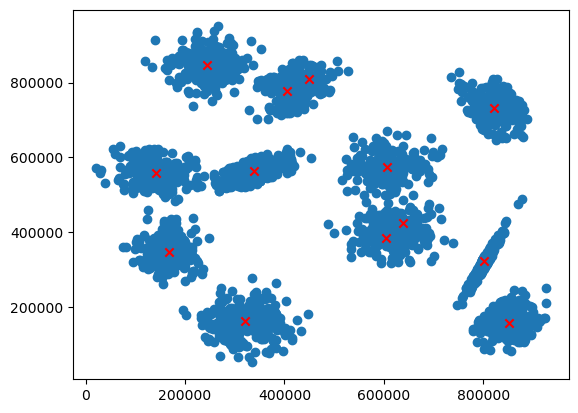

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert rdd_split_int RDD into Spark DataFrame and then to Pandas DataFrame
rdd_split_int_df_pandas = spark.createDataFrame(rdd_split_int, schema=["col1", "col2"]).toPandas()

# Convert cluster_centers to a pandas DataFrame
cluster_centers_pandas = pd.DataFrame(cluster_centers, columns=["col1", "col2"])

# Create an overlaid scatter plot of clusters and centroids
plt.scatter(rdd_split_int_df_pandas["col1"], rdd_split_int_df_pandas["col2"])
plt.scatter(cluster_centers_pandas["col1"], cluster_centers_pandas["col2"], color="red", marker="x")
plt.show()